In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results

In [3]:
# Define neural network parameters
layer_size = [784, 24, 24, 24, 10, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "tanh"]

# Create and train the model
model = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot = model.fit(X_train, y_train, 20, 0.1, 20, True, X_val, y_val)

# Predict on the test set
y_pred = model.predict(X_test)

# Convert one-hot predictions to labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Epoch 1/20, Loss: 0.9014, Val_loss: 0.9002
Epoch 2/20, Loss: 0.9005, Val_loss: 0.9004
Epoch 3/20, Loss: 0.9006, Val_loss: 0.9000
Epoch 4/20, Loss: 0.9006, Val_loss: 0.9008
Epoch 5/20, Loss: 0.9005, Val_loss: 0.9001
Epoch 6/20, Loss: 0.9005, Val_loss: 0.9001
Epoch 7/20, Loss: 0.9006, Val_loss: 0.9008
Epoch 8/20, Loss: 0.9005, Val_loss: 0.9004
Epoch 9/20, Loss: 0.9005, Val_loss: 0.8999
Epoch 10/20, Loss: 0.9005, Val_loss: 0.9001
Epoch 11/20, Loss: 0.9005, Val_loss: 0.9003
Epoch 12/20, Loss: 0.9005, Val_loss: 0.9000
Epoch 13/20, Loss: 0.9005, Val_loss: 0.9004
Epoch 14/20, Loss: 0.9005, Val_loss: 0.9009
Epoch 15/20, Loss: 0.9004, Val_loss: 0.9002
Epoch 16/20, Loss: 0.9005, Val_loss: 0.9004
Epoch 17/20, Loss: 0.9005, Val_loss: 0.9003
Epoch 18/20, Loss: 0.9005, Val_loss: 0.9009
Epoch 19/20, Loss: 0.9005, Val_loss: 0.9007
Epoch 20/20, Loss: 0.9005, Val_loss: 0.9002
Accuracy: 0.1064
F1-score: 0.0205

Confusion Matrix:
[[   0    0    0    0    0    0    0 1154    0    0]
 [   0    0    0    0  

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


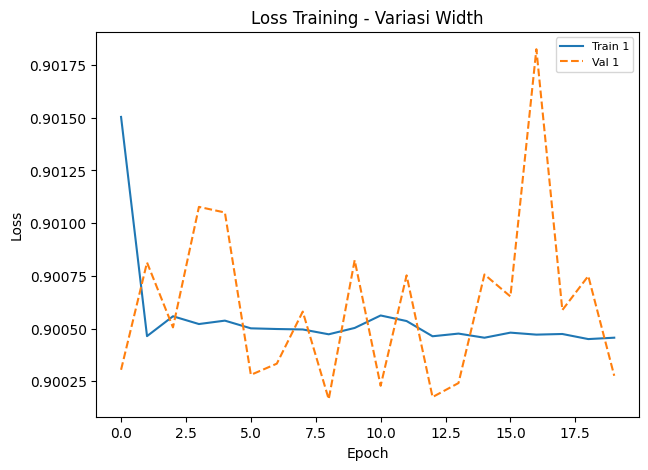

In [13]:
plot_training_results([plot])